In [1]:
import mdtraj as md
import bpmfwfft.grids as grids
import numpy as np

In [2]:
from os import walk
import socket
if socket.gethostname() == 'jim-Mint':
    ppi_path = '/media/jim/Research_TWO/FFT_PPI'
    home = '/home/jim'
else:
    ppi_path = '/mnt/fft/FFT_PPI'
    home = '/home/jtufts'

In [3]:
f = {}
for (dirpath, dirnames, filenames) in walk(f'{ppi_path}/2.redock/2.minimize'):
    if filenames[0] != 'run_me.sh':
        if 'complex.pdb' in filenames:
            f[dirpath.split('/')[6]] = dirpath + '/complex.pdb'

In [4]:
keys = list(f.keys())
keys.sort()
system = keys[127] #36 
system

'2OOB_A:B'

In [5]:
%%time
import netCDF4 as nc
import numpy as np
# grid_name = "sasa1.nc"
grid_name = "grid_2oob.nc"
grid_path = f'{ppi_path}/2.redock/4.receptor_grid/{system}'
print(grid_path)
grid_nc = '%s/%s'%(grid_path,grid_name)


#parsing some of the netcdf variables from grid.nc
grid_variables = nc.Dataset(grid_nc, 'r').variables
counts = nc.Dataset(grid_nc, 'r').variables["counts"][:]
x = nc.Dataset(grid_nc, 'r').variables["x"][:]
y = nc.Dataset(grid_nc, 'r').variables["y"][:]
z = nc.Dataset(grid_nc, 'r').variables["z"][:]
# electrostatic = nc.Dataset(grid_nc, 'r').variables["electrostatic"][:]
# lja = nc.Dataset(grid_nc, 'r').variables["LJa"][:]
# ljr = nc.Dataset(grid_nc, 'r').variables["LJr"][:]
sasa = nc.Dataset(grid_nc, 'r').variables["sasa"][:]
occupancy = nc.Dataset(grid_nc, 'r').variables["occupancy"][:]
trans_crd = nc.Dataset(grid_nc, 'r').variables["trans_crd"][:]
rec_disp = nc.Dataset(grid_nc, 'r').variables["displacement"][:]
water = nc.Dataset(grid_nc, 'r').variables["water"][:]

/mnt/fft/FFT_PPI/2.redock/4.receptor_grid/2OOB_A:B
CPU times: user 20.9 ms, sys: 23.7 ms, total: 44.6 ms
Wall time: 43.6 ms


In [6]:
%%time
from bpmfwfft.grids import RecGrid
from bpmfwfft.grids import LigGrid

rec_prmtop = f"{ppi_path}/2.redock/1.amber/{system}/receptor.prmtop"
lj_sigma_scal_fact = 1.0
rec_inpcrd = f"{ppi_path}/2.redock/2.minimize/{system}/receptor.inpcrd"

bsite_file = None
grid_nc_file = f"{ppi_path}/2.redock/4.receptor_grid/{system}/{grid_name}"

lig_prmtop = f"{ppi_path}/2.redock/1.amber/{system}/ligand.prmtop"
# lig_inpcrd = f"{ppi_path}/2.redock/2.minimze/2OOB_A:B/ligand.inpcrd"

rot_nc = f"{ppi_path}/2.redock/3.ligand_rand_rot/{system}/rotation.nc"
lig_rot = nc.Dataset(rot_nc, 'r').variables['positions']
lig_inpcrd = f"{ppi_path}/2.redock/2.minimize/{system}/ligand.inpcrd"

rho = 9.0
rc_scale = 0.76
rs_scale = 0.53
rm_scale = 0.55
lc_scale = 0.81
ls_scale = 0.50
lm_scale = 0.54


def _create_rec_grid(rec_prmtop, lj_sigma_scal_fact, rc_scale, rs_scale, rm_scale, rho, rec_inpcrd, bsite_file, grid_nc_file):
    rec_grid = RecGrid(rec_prmtop, lj_sigma_scal_fact, rc_scale, rs_scale, rm_scale, rho, rec_inpcrd, bsite_file, 
                        grid_nc_file, new_calculation=False)
    return rec_grid

def _create_lig_grid(lig_prmtop, lj_sigma_scal_fact, lc_scale, ls_scale, lm_scale, lig_inpcrd, rec_grid):
    lig_grid = LigGrid(lig_prmtop, lj_sigma_scal_fact, lc_scale, ls_scale, lm_scale, lig_inpcrd, rec_grid)
    return lig_grid

rec_grid = _create_rec_grid(rec_prmtop, lj_sigma_scal_fact, rc_scale, rs_scale, rm_scale, rho, rec_inpcrd, bsite_file, grid_nc_file)

lig_grid = _create_lig_grid(lig_prmtop, lj_sigma_scal_fact, lc_scale, ls_scale, lm_scale, lig_inpcrd, rec_grid)
rot_num = 0
lig_grid._crd = np.array(lig_rot[rot_num], dtype=np.float64)
lig_grid._move_ligand_to_lower_corner()

[1.]
/mnt/fft/FFT_PPI/2.redock/4.receptor_grid/2OOB_A:B/grid_2oob.nc
x
[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108.]
y
[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108.]
z
[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108.]
d0
[2. 0. 0.]
d1
[0. 2. 0.]
d2
[0. 0. 2.]
spacing
[2. 2. 2.]
counts
[55 55 55]
origin

In [10]:
w = np.where(sasa == sasa.max())
a = 1
for i in w:
    a = a*i
print(a)
print(sasa.argmax())
flatsa = sasa.flatten()
print(flatsa[1294482], flatsa[5156658])
np.ravel_multi_index(w, sasa.shape)

[1294482]
5156658
0.0 0.791456187536647


array([5156658])

In [11]:
lig_grid._get_molecule_sasa(0.14,960).sum()

3486.464

In [13]:
rec_grid._prmtop["VDW_RADII"]

array([1.55, 1.2 , 1.2 , ..., 1.7 , 1.52, 1.52])

In [15]:
rec_grid._crd

masked_array(
  data=[[61.0819392, 46.7228166, 66.0893216],
        [60.1320844, 46.6854695, 65.7510295],
        [61.1340814, 47.4683115, 66.7760267],
        ...,
        [37.2154223, 64.9233494, 39.3382921],
        [37.3659827, 64.4399015, 40.4774942],
        [36.6371842, 64.3307749, 38.4072223]],
  mask=False,
  fill_value=1e+20)

In [12]:
def write_lig_dx(FN, data, grid):
    """
    Writes a grid in dx format
    """
    n_points = data['counts'][0] * data['counts'][1] * data['counts'][2]
    if FN.endswith('.dx'):
        F = open(FN, 'w')

    F.write("""object 1 class gridpositions counts {0[0]} {0[1]} {0[2]}
origin {1[0]} {1[1]} {1[2]}
delta {2[0]} 0.0 0.0
delta 0.0 {2[1]} 0.0
delta 0.0 0.0 {2[2]}
object 2 class gridconnections counts {0[0]} {0[1]} {0[2]}
object 3 class array type double rank 0 items {3} data follows
""".format(data['counts'], data['origin'], data['spacing'], n_points))

    for start_n in range(0, len(grid.ravel()), 3):
        F.write(' '.join(['%6e' % c
                        for c in grid.ravel()[start_n:start_n + 3]]) + '\n')

    F.write('object 4 class field\n')
    F.write('component "positions" value 1\n')
    F.write('component "connections" value 2\n')
    F.write('component "data" value 3\n')
    F.close()

In [13]:
def write(FN, data, grid, multiplier=None):
    """
    Writes a grid in dx or netcdf format.
    The multiplier affects the origin and spacing.
    """
    if multiplier is not None:
      data_n = {
        'origin': multiplier * data['origin'],
        'counts': data['counts'],
        'spacing': multiplier * data['spacing'],
        'vals': grid
      }
    else:
      data_n = data
    if FN.endswith('.nc'):
        print('skip')
#       _write_nc(FN, data_n)
    elif FN.endswith('.dx') or FN.endswith('.dx.gz'):
      write_lig_dx(FN, data_n, grid)
    else:
      raise Exception('File type not supported')

In [11]:
# print(mdtraj_areas.sum(), areas.sum(), grid.sum())
import bpmfwfft.IO as IO
data = {"origin": lig_grid._grid['origin'], "spacing": lig_grid._spacing, "counts": lig_grid._grid["counts"]}
FN="/media/jim/Research_TWO/FFT_PPI/2.redock/4.receptor_grid/2OOB_A:B/lig_ones.dx"
write(FN, data, l_ones)

NameError: name 'write' is not defined

In [7]:
def rmsd(P: np.ndarray, Q: np.ndarray, **kwargs) -> float:
    """
    Calculate Root-mean-square deviation from two sets of vectors V and W.
    Parameters
    ----------
    V : array
        (N,D) matrix, where N is points and D is dimension.
    W : array
        (N,D) matrix, where N is points and D is dimension.
    Returns
    -------
    rmsd : float
        Root-mean-square deviation between the two vectors
    """
    diff = P - Q
    return np.sqrt((diff * diff).sum() / P.shape[0])

In [12]:
import copy
lig_grid._move_ligand_to_lower_corner()
lig_grid.translate_ligand(np.array([68,87,45])*lig_grid._spacing)
ref = copy.deepcopy(lig_grid._crd)
lig_grid._move_ligand_to_lower_corner()
lig_grid.translate_ligand(np.array([69,87,45])*lig_grid._spacing)
tar = copy.deepcopy(lig_grid._crd)

print("rmsd", rmsd(ref, tar))

lower ligand corner print [140.59105129 176.81711311  92.83056588]
Ligand translated by [-138.0 -174.0 -90.0]
move_ligand_to_lower_corner [-138.0 -174.0 -90.0]
lower ligand corner print [138.59105129 176.81711311  92.83056588]
Ligand translated by [-136.0 -174.0 -90.0]
move_ligand_to_lower_corner [-136.0 -174.0 -90.0]
rmsd 2.0


In [13]:
# fft_path = f'{ppi_path}/2.redock/5.fft_sampling/{system}'
fft_path = '/mnt/fft/FFT_PPI/2.redock/5.fft_sampling/2OOB_A:B'
fft_name = "fft_sampling_maintest.nc"
fft_nc = '%s/%s'%(fft_path,fft_name)
fft_variables = nc.Dataset(fft_nc, 'r').variables
resampled_trans_vectors = nc.Dataset(fft_nc, 'r').variables["sasa_resampled_trans_vectors"][rot_num][:]
resampled_energies = nc.Dataset(fft_nc, 'r').variables["sasa_resampled_energies"][rot_num][:]/-0.005
native_pose_energy = nc.Dataset(fft_nc, 'r').variables["native_pose_energy"][:]/-0.005
native_translation = nc.Dataset(fft_nc, 'r').variables["native_translation"][:]
# inds = resampled_energies.argsort()
# translations = list(resampled_trans_vectors[inds[::-1]])
# trans_scores = list(resampled_energies[inds[::-1]])
# inds = resampled_energies.argsort()
translations = list(resampled_trans_vectors)
trans_scores = list(resampled_energies)

In [14]:
# print(trans_scores[0], translations[0], native_pose_energy, native_translation)
print(resampled_trans_vectors)

[[13 18  7]
 [14 19  7]
 [14 18  7]
 ...
 [23 17 25]
 [25 19 20]
 [12  6 24]]


In [15]:
def cat_grids(grid1, grid2):
    prmtop = cat_dictionaries(grid1._prmtop,grid2._prmtop)
    crd = cat_dictionaries(grid1._crd,grid2._crd)
    cat_grid = copy.deepcopy(grid1)
    cat_grid._prmtop = prmtop
    cat_grid._crd = crd
    return cat_grid

def cat_dictionaries(dict1, dict2):
    dict1_copy = copy.deepcopy(dict1)
    dict2_copy = copy.deepcopy(dict2)
    
    if isinstance(dict1_copy, dict):
        keys = list(dict1_copy.keys())
        for key in keys:
            # print(keys)
            # print(key)
            dict1_copy[key] = cat_values(dict1[key], dict2[key])
        return dict1_copy
    
    elif isinstance(dict1_copy, np.ndarray):
        return np.concatenate((dict1_copy,dict2_copy))

def cat_values(a1, a2):
    array1 = copy.deepcopy(a1)
    array2 = copy.deepcopy(a2)
    if isinstance(array1, np.ndarray):
        return np.concatenate((array1,array2))
    elif isinstance(array1, dict):
        return cat_dictionaries(array1, array2)
    elif isinstance(array1, (int, np.int64)):
        # print(f"{array1+array2}")
        return array1 + array2
    elif isinstance(array1, list):
        # print(type(array1))
        # print(f'array1:{len(array1)}, array2:{len(array2)}')
        array1.extend(array2)
        # print(f'complex:{len(array1)}, sum:{len(a1)+len(a2)}')
        return array1

        
        
import copy
# result = map(cat_dictionaries, rec_grid._prmtop, lig_grid._prmtop)
delta_sasas = []
colors = []
for v,vector in enumerate(translations):
    vector = np.array(vector*lig_grid._spacing)
    lig_grid._move_ligand_to_lower_corner()
    print(vector)
    lig_grid.translate_ligand(vector)
    com_grid = cat_grids(rec_grid, lig_grid)
    c_sasa = com_grid._get_molecule_sasa(0.14, 960).sum()
    l_sasa = lig_grid._get_molecule_sasa(0.14, 960).sum()
    r_sasa = rec_grid._get_molecule_sasa(0.14, 960).sum()
    d_sasa = (l_sasa + r_sasa) - c_sasa
    delta_sasas.append(d_sasa)
    rmsd_to_native = rmsd(ref, lig_grid._crd)
    colors.append(rmsd_to_native)
        
    print(c_sasa, l_sasa + r_sasa, d_sasa)
    # com_grid.write_pdb(f'{home}/Desktop/translations/sasacom/trans{v}.pdb', "w")
    # lig_grid.write_pdb(f'{home}/Desktop/translations/sasalig/trans{v}.pdb', "w")
    # rec_grid.write_pdb(f'{home}/Desktop/translations/lig/rec.pdb', "w")


lower ligand corner print [140.59105129 176.81711311  92.83056588]
Ligand translated by [-138.0 -174.0 -90.0]
move_ligand_to_lower_corner [-138.0 -174.0 -90.0]
[26. 36. 14.]
6414.848 7970.2354 1555.3872
lower ligand corner print [28.59105129 38.81711311 16.83056588]
Ligand translated by [-26.0 -36.0 -14.0]
move_ligand_to_lower_corner [-26.0 -36.0 -14.0]
[28. 38. 14.]
6563.4805 7970.147 1406.6665
lower ligand corner print [30.59105129 40.81711311 16.83056588]
Ligand translated by [-28.0 -38.0 -14.0]
move_ligand_to_lower_corner [-28.0 -38.0 -14.0]
[28. 36. 14.]
6566.4854 7970.147 1403.6616
lower ligand corner print [30.59105129 38.81711311 16.83056588]
Ligand translated by [-28.0 -36.0 -14.0]
move_ligand_to_lower_corner [-28.0 -36.0 -14.0]
[28. 44. 16.]
6625.8247 7970.147 1344.3223
lower ligand corner print [30.59105129 46.81711311 18.83056588]
Ligand translated by [-28.0 -44.0 -16.0]
move_ligand_to_lower_corner [-28.0 -44.0 -16.0]
[28. 34. 14.]
6655.7686 7970.147 1314.3784
lower ligand 

/tmp/ipykernel_222873/2575585006.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_y[ind] = point*model.coef_ + model.intercept_
/tmp/ipykernel_222873/2575585006.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.plot(rx, ry, '-r', label=f'DELTA_SASA={float(model.coef_):.4f}*GRID_SASA + {float(model.intercept_):.2f}')


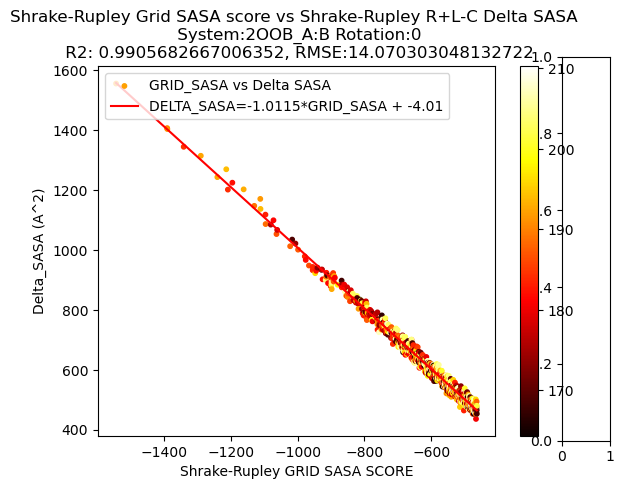

In [16]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
x = np.array(trans_scores)*-1
y = np.array(delta_sasas)
C = np.array(colors)

x = x.reshape((-1,1))
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

pred_y = np.zeros(len(y), dtype=float)
for ind,point in enumerate(x):
    pred_y[ind] = point*model.coef_ + model.intercept_
MSE = mean_squared_error(y, pred_y)
RMSE = math.sqrt(MSE)

# scatter plot
fig, ax = plt.subplots()
# ax.scatter(x, y, 10, c=C, alpha=0.01, marker='o', cmap="hot",
#         label="GRID_SASA vs Delta SASA", edgecolors="black")
sc = ax.scatter(x, y, 10, c=C, alpha=1, marker='o',
        label="GRID_SASA vs Delta SASA", cmap='hot')
# regression plot
rx = np.linspace(x.min(), x.max(), 165)
ry = model.coef_*rx + model.intercept_

ax.plot(rx, ry, '-r', label=f'DELTA_SASA={float(model.coef_):.4f}*GRID_SASA + {float(model.intercept_):.2f}')
plt.xlabel("Shrake-Rupley GRID SASA SCORE")
plt.ylabel("Delta_SASA (A^2)")
ax.set_title(f'Shrake-Rupley Grid SASA score vs Shrake-Rupley R+L-C Delta SASA {chr(10)} System:{system} Rotation:{rot_num}{chr(10)} R2: {r_sq}, RMSE:{RMSE}')
ax.legend(loc='upper left')
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(sc)
# ax.colorbar()
plt.show()

In [ ]:
for u in range(len(translations)):
    print(score[translations[u]], delta_sasas[u])

In [12]:
com_grid.write_pdb('/home/jtufts/Desktop/test.pdb', "w")
com_grid.write_box('/home/jtufts/Desktop/testbox.pdb')

NATOM:2008


In [134]:
# print(cat_dictionaries(rec_grid._prmtop['POINTERS'], lig_grid._prmtop['POINTERS']))
print(com_grid._get_molecule_sasa(0.14, 960).sum())
print(lig_grid._get_molecule_sasa(0.14, 960).sum())
print(rec_grid._get_molecule_sasa(0.14, 960).sum())
print(rec_grid._get_molecule_sasa(0.14, 960).sum()+lig_grid._get_molecule_sasa(0.14, 960).sum())

7170.8086
3486.3755
4483.7715
7970.147


In [32]:
print(lig_grid._molecule_sasa.sum())

3486.464


In [140]:
import pickle as p
f1 = np.load('/home/jtufts/Desktop/npy/delta_sasa_complex_minus_rl.npy')
f2 = p.load(open('/home/jtufts/src/p39/fftanalysis/data/lig_sasa_sums.p', "rb"))
f3 = p.load(open('/home/jtufts/src/p39/fftanalysis/data/rec_sasa_sums.p', "rb"))
f4 = p.load(open('/home/jtufts/src/p39/fftanalysis/data/lig_sasas.p', "rb"))
f5 = p.load(open('/home/jtufts/src/p39/fftanalysis/data/rec_sasas.p', "rb"))
f6 = p.load(open('/home/jtufts/src/p39/fftanalysis/data/complex_sasas.p', "rb"))
# f4

In [138]:
k2 = list(f2.keys())
k2.sort()
print(k2[127],f2[k2[127]]*100+f3[k2[127]]*100)

2OOB_A:B 7970.235824584961


In [ ]:
lig_grid._move_ligand_to_lower_corner()
ls = lig_grid._get_molecule_sasa(0.14, 960)
rs = rec_grid._get_molecule_sasa(0.14, 960)

for m,val in enumerate(f4[k2[127]][0]):
    print(val,ls[0][m])

In [ ]:
for p,l in enumerate(delta_sasas):
    print(l, f1[127]*100)

In [165]:
(rec_disp - lig_grid._displacement)/0.5

masked_array(data=[68.0, 87.0, 45.0],
             mask=[False, False, False],
       fill_value=1e+20)

In [160]:
rec_disp

masked_array(data=[40.5, 56. , 27. ],
             mask=False,
       fill_value=1e+20)

In [166]:
score[68,87,45]

591.9999999999999

In [167]:
cfft[68,87,45]

(592.0000000000001+2.326614353372607e-13j)

In [48]:
def regplot(trans_scores, delta_sasas, colors, name):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import linregress
    from sklearn.linear_model import LinearRegression

    x = np.array(trans_scores)
    y = np.array(delta_sasas)
    C = np.array(colors, dtype=str)

    change = np.where(C == 'yellow')
    C[change] = "black"

    indicies = np.where(y < 1525)
    # indicies = np.where(y == 0)

    indicies = indicies[::-1]

    for i in indicies:
        x = np.delete(x, i)
        y = np.delete(y, i)
        C = np.delete(C, i)

    indicies = np.where(x == 0)
    indicies = indicies[::-1] 

    for i in indicies:
        x = np.delete(x, i)
        y = np.delete(y, i)
        C = np.delete(C, i)

    x = x.reshape((-1,1))

    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)

    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    print('slope:', model.coef_)


    # scatter plot
    fig, ax = plt.subplots()
    ax.scatter(x, y, 10, c=C, alpha=0.5, marker='+',
            label="SC SCORE vs Delta SASA")
    # regression plot
    rx = np.linspace(x.min(), x.max(), 165)
    ry = model.coef_*rx + model.intercept_

    ax.plot(rx, ry, '-r', label=f'DELTA_SASA={float(model.coef_):.4f}*SC_SCORE + {float(model.intercept_):.2f}')
    plt.xlabel("SC_score")
    plt.ylabel("Delta_SASA (nm^2)")
    ax.set_title(f'R2: {r_sq}')
    ax.legend(loc='upper left')
    plt.savefig(f'{name}')

In [ ]:
for i in range(9):
    # rx,ry,rz = np.random.randint(0, counts[0], 3)
    # rx = np.random.randint(19, 39, 1)
    # ry = np.random.randint(81, 101, 1)
    # rz = np.random.randint(74, 94, 1)
    rx = np.random.randint(26, 32, 1)
    ry = np.random.randint(113, 119, 1)
    rz = np.random.randint(49, 55, 1)
    lgrid_trans = grids.translate_grid(lgrid["SASA"], [rx,ry,rz])
    result = (lgrid_trans*rgrid).sum()
    print((rx,ry,rz), result, cfft[rx,ry,rz], (np.real(result)-np.imag(result)), score[rx,ry,rz])

In [ ]:
for i in range(len(colors)):
    print(i, colors[i])

In [ ]:
rec_grid._prmtop

In [49]:
sasa.sum()

162235.20273234017

In [50]:
lgrid["sasa"].sum()

125989.38912844221

Text(0, 0.5, 'Number of points')

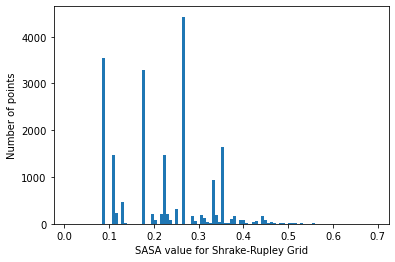

In [36]:
import matplotlib.pyplot as plt

plt.hist(r_grid.flatten(), bins=100, range=(.01, 0.69))
plt.xlabel("SASA value for Shrake-Rupley Grid")
plt.ylabel("Number of points")

In [18]:
a = np.array([1,2,3,4,5,6,7,8,9,10])
print(a)
a = a/5
a

[ 1  2  3  4  5  6  7  8  9 10]


array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [13]:
k = 0

for j in range(10):
    for i in list(range(10))[k:]:
        k = k + 10
        print(i)

0
1
2
3
4
5
6
7
8
9


In [7]:
print(list(range(10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [40]:
lig_grid._crd.argmin()

2260

In [43]:
np.array([lig_grid._crd[:,i].argmin() for i in range(3)], dtype=int)

array([342, 753,   3])

In [57]:
np.array([lig_grid._crd[:,i].min() for i in range(3)], dtype=float)

array([42.17420387, 31.54957533, 60.36855125])

In [56]:
lig_grid._crd[753]

array([46.4203577 , 31.54957533, 76.50253725])

In [58]:
lig_grid._crd[3]

array([56.34309387, 68.54642868, 60.36855125])

In [63]:
edge_ind = np.array([lig_grid._crd[:,i].argmin() for i in range(3)], dtype=int)
edge_radii = np.array([lig_grid._prmtop["VDW_RADII"][i] for i in edge_ind], dtype=float)
print(edge_radii)

[1.2 1.2 1.2]


In [61]:
lig_grid._prmtop["VDW_RADII"][342]

1.2

In [40]:
lig_grid._displacement

masked_array(data=[-32.5, -42.5, -23. ],
             mask=False,
       fill_value=1e+20)

In [55]:
type(np.array(rec_disp-lig_grid._displacement*lig_grid._spacing))

numpy.ndarray

In [51]:
lig_grid._move_ligand_to_lower_corner()

Ligand translated by [0. 0. 0.]
[2.64105129 2.36711311 2.38056588]


In [52]:
lig_grid._displacement

masked_array(data=[0., 0., 0.],
             mask=False,
       fill_value=1e+20)

In [100]:
sasa.sum()

937691.0

In [17]:
good_grid = nc.Dataset("/media/jim/Research_TWO/FFT_PPI/2.redock/4.receptor_grid/2OOB_A:B/no_gaussian.nc")
good_sasa = np.array(good_grid.variables["sasa"])
error_grid = nc.Dataset("/media/jim/Research_TWO/FFT_PPI/2.redock/4.receptor_grid/2OOB_A:B/shrakerupley.nc")
error_sasa = np.array(error_grid.variables["sasa"])

In [18]:
error_sasa.sum()

937691.0

In [19]:
good_sasa.sum()

937691.0

In [21]:
diff = good_sasa - error_sasa

In [22]:
import matplotlib.pyplot as plt

0.0

(0.0, 10.0)

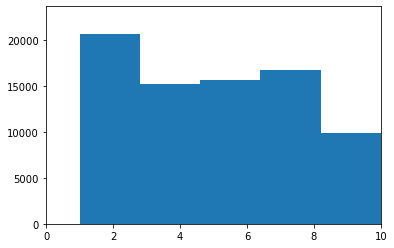

In [47]:
plt.hist(good_ones.flatten(), bins=10)
plt.xlim(0, 10)


(0.0, 10.0)

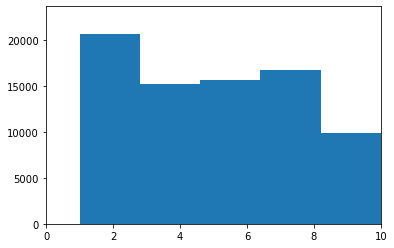

In [46]:
plt.hist(error_ones.flatten(), bins=10)
plt.xlim(0, 10)

In [40]:
good_ones = good_sasa[good_sasa>0]
error_ones = error_sasa[error_sasa>0]

In [41]:
good_ones

array([1., 1., 1., ..., 1., 1., 1.])

In [42]:
error_ones

array([1., 1., 1., ..., 1., 1., 1.])

In [18]:
score.max()

1333.8928316099477

In [20]:
translations*lig_grid._spacing

masked_array(
  data=[[46.5, 45.5, 44.5],
        [46.5, 45.5, 45. ],
        [47. , 45. , 45. ],
        ...,
        [56.5, 76.5, 45.5],
        [43. , 64. , 51.5],
        [39.5, 75.5, 46.5]],
  mask=False,
  fill_value=999999)